In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
N = 1000
steps = 10000
sigma = 5*10**(-4)
epsilon = -(1e4)/(6e23)
k_B = 1.380649e-23

In [3]:
def seudo_modify(char):
    if char == 'H': return 'C'
    else: return 'H'

def find_probability(protein,i):
    left_neighbor = protein[i - 1] if i > 0 else protein[-1]
    right_neighbor = protein[i + 1] if i < N - 1 else protein[0]
    focus = left_neighbor+protein[i]+right_neighbor
    attempt = left_neighbor+seudo_modify(protein[i])+right_neighbor
    temp = focus + '-' + attempt
    return Probability_Mapping[temp]


In [4]:

def metropolis_step(protein, T):
    """Perform one Monte Carlo step using the Metropolis algorithm."""
    i = np.random.randint(0, N)  # Randomly select an amino ,select a number randomly from 0 to N-1
    # Metropolis acceptance criterion
    if np.random.rand() < find_probability(protein,i):
        #generate a uniform distributed value from 0 to 1
        # Flip the state: 'C' -> 'H' or 'H' -> 'C'
        protein[i] = 'H' if protein[i] == 'C' else 'C'

def simulate_protein(T, steps):
    """Simulate protein folding over a number of steps."""
    protein = ['C'] * N  # Initialize the protein in all 'C' (unfolded)
    helical_fraction = []  # Track the fraction of 'H' states
    
    for step in range(steps):
        metropolis_step(protein, T)
        helical_fraction.append(protein.count('H') / N)  # Calculate helical fraction
    
    return helical_fraction
    # return the helical fraction for each step of the process

def run_simulation(T, steps, repeats):
    """Run multiple simulations and average the helical fraction at steady state."""
    steady_state_fractions = []
    
    for _ in range(repeats):
        helical_fraction = simulate_protein(T, steps)
        steady_state_fractions.append(np.mean(helical_fraction[-100:]))  # Average over last 100 steps
        # We take the last 1000 helical fractions to be the steady state
        # Calculate the average of the average (steady state)
    
    return np.mean(steady_state_fractions)
    # return the steady helical fraction of each round of simulation


Text(0.5, 1.0, 'Transition Curve')

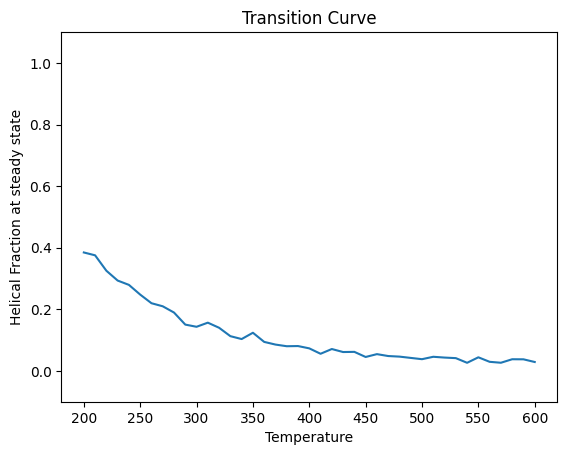

In [5]:
# Parameters
Temperature = np.array(range(200,610,10))


repeats = 3
res = []
for T in Temperature:
    s = np.exp(-epsilon/(k_B*T))
    Probability_Mapping = {
        'CCC-CHC': sigma*s,
        'CHC-CCC': 1,
        'HCC-HHC': s,
        'HHC-HCC': 1,
        'HHH-HCH': 1,
        'HCH-HHH': s/sigma,
        'CHH-CCH': 1,
        'CCH-CHH': s
    }
    temp = run_simulation(T,steps,repeats)
    res.append(temp)
plt.plot(Temperature,res)
plt.xlabel('Temperature')
plt.ylabel('Helical Fraction at steady state')
plt.ylim((-0.1,1.1))
plt.title('Transition Curve')